In [34]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('final_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,OverTime_Yes,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1


In [4]:
df.shape

(1470, 45)

In [5]:
#Checking duplicacy in data
#len(df.EmployeeNumber.unique())

In [6]:
#put everything in feature vector X except 'Attrition"
X= df.loc[:,df.columns!='Attrition_Yes']

#reate target variable y from attrition column
y= df['Attrition_Yes']

In [7]:
#del X['Attrition_Yes']

In [8]:
#standarise the variables
scaler=StandardScaler()
scaler.fit(X,y)
scaler.transform(X,y)

c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


array([[ 0.4463504 ,  0.74252653, -1.01090934, ...,  1.51524392,
        -0.48185865,  0.63984058],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.65995975,
         2.07529738, -1.5628893 ],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.65995975,
        -0.48185865,  0.63984058],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.65995975,
        -0.48185865,  0.63984058],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  1.51524392,
         2.07529738, -1.5628893 ],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.65995975,
        -0.48185865,  0.63984058]])

In [9]:
#split the data in train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [10]:
#steps = [('scaler', StandardScaler())
#        ('model',RandomForestClassifier(n_estimators = 100)),
#      ]
#pipeline = Pipeline(steps)
# Fit the pipeline to the train set
#pipeline.fit(X_train,y_train)
# Predict the labels of the test set
#y_pred = pipeline.predict(X_test)
 
# Compute metrics
#print(classification_report(y_test,y_pred))

## Using Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

#evaluate the performance
score=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
score

0.8775510204081632

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,clf.predict_proba(X_test)[:, 1])

0.7776100086281278

In [24]:
print(classification_report(y_test,y_pred, labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.87      0.99      0.93       380
          1       0.62      0.08      0.14        61

avg / total       0.84      0.87      0.82       441



In [33]:
from sklearn.metrics import roc_curve
# predict probabilities
lr_probs = clf2.predict_proba(X_test)
# calculate scores
lr_auc = roc_auc_score(y_test,lr_probs[:, 1])
# summarize scores
print('Random: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test,lr_probs[:, 1])

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Random: ROC AUC=0.770


AttributeError: 'tuple' object has no attribute 'plot'

## Using Random Forest

In [15]:
#build the classifier
clf2=RandomForestClassifier(n_estimators = 100)
clf2.fit(X_train,y_train)

#predict using model
y_pred2=clf2.predict(X_test)
y_score=clf2.predict_proba(X_test)

#evaluate the performance
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,clf2.predict_proba(X_test)[:, 1])

0.7702761000862812

In [12]:
print(classification_report(y_test,y_pred2, labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.87      0.99      0.93       380
          1       0.62      0.08      0.14        61

avg / total       0.84      0.87      0.82       441



Random Forest: f1=0.143 auc=0.395


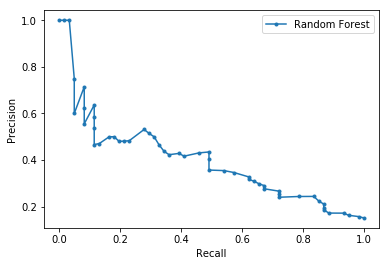

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
lr_probs = clf2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = clf2.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
#no_skill = len(y_test[y_test==1]) / len(y_test)
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

random forest: ROC AUC=0.770


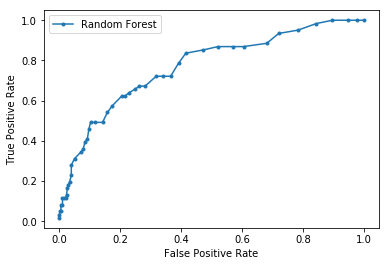

In [41]:
# predict probabilities
lr_probs = clf2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
#ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('random forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [49]:
y_prob=clf2.predict_proba(X_test)
y_prob

array([[0.84, 0.16],
       [0.95, 0.05],
       [0.51, 0.49],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.68, 0.32],
       [0.88, 0.12],
       [0.83, 0.17],
       [0.85, 0.15],
       [0.75, 0.25],
       [0.57, 0.43],
       [0.75, 0.25],
       [0.85, 0.15],
       [0.86, 0.14],
       [0.89, 0.11],
       [0.69, 0.31],
       [0.73, 0.27],
       [0.89, 0.11],
       [0.92, 0.08],
       [0.93, 0.07],
       [0.83, 0.17],
       [0.92, 0.08],
       [0.93, 0.07],
       [0.86, 0.14],
       [0.88, 0.12],
       [0.76, 0.24],
       [0.67, 0.33],
       [0.89, 0.11],
       [0.84, 0.16],
       [0.96, 0.04],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.8 , 0.2 ],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.75, 0.25],
       [0.62, 0.38],
       [0.91, 0.09],
       [0.79, 0.21],
       [0.8 , 0.2 ],
       [0.94, 0.06],
       [0.95, 0.05],
       [0.47, 0.53],
       [0.87, 0.13],
       [0.69, 0.31],
       [0.61,

In [51]:
from sklearn.metrics import confusion_matrix

for threshold in [1, 0.2, 0.5, 0.7, 0]:  # test 3 score thresholds which are used to determine if a class is predicted to be 0 or 1
  print("threshold:", threshold)
  print("----------")
  y_pred = [0 if y < threshold else 1 for y in lr_probs]

  
  cm = confusion_matrix(y_test, y_pred)

  print()
  print("Classification report:")
  print(classification_report(y_test, y_pred))
  print()

threshold: 1
----------

Classification report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.93       380
          1       0.00      0.00      0.00        61

avg / total       0.74      0.86      0.80       441


threshold: 0.2
----------

Classification report:
             precision    recall  f1-score   support

          0       0.93      0.75      0.83       380
          1       0.30      0.66      0.41        61

avg / total       0.84      0.74      0.77       441


threshold: 0.5
----------

Classification report:
             precision    recall  f1-score   support

          0       0.87      0.99      0.93       380
          1       0.56      0.08      0.14        61

avg / total       0.83      0.86      0.82       441


threshold: 0.7
----------

Classification report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.93       380
          1       0.00      0.00      0.00     

c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Hyperparameter Tuning:
    

In [ ]:
#!pip install tqdm

In [39]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap,
               'max_features': max_features,
              'min_samples_leaf': min_samples_leaf}

clf3 = RandomizedSearchCV(estimator = clf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = None)
    # Fit the random search model
clf3.fit(X_train,y_train)

   #predict using model
y_pred3=clf3.predict(X_test)

   #evaluate the performance
score=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=944, max_depth=14, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=944, max_depth=14, min_samples_leaf=2, total=   3.4s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=944, max_depth=14, min_samples_leaf=2 


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=944, max_depth=14, min_samples_leaf=2, total=   3.5s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=944, max_depth=14, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=944, max_depth=14, min_samples_leaf=2, total=   3.7s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=467, max_depth=42, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=467, max_depth=42, min_samples_leaf=2, total=   1.7s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=467, max_depth=42, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=467, max_depth=42, min_samples_leaf=2, total=   1.7s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=467, max_depth=42, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap

[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=393, max_depth=38, min_samples_leaf=1, total=   1.3s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=669, max_depth=34, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=669, max_depth=34, min_samples_leaf=1, total=   2.6s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=669, max_depth=34, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=669, max_depth=34, min_samples_leaf=1, total=   2.7s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=669, max_depth=34, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=669, max_depth=34, min_samples_leaf=1, total=   2.5s
[CV] min_samples_split=2, bootstrap=True, max_features=sqrt, n_estimators=357, max_depth=30, min_samples_leaf=2 
[CV]  min_samples_split=2, bootstrap

[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=779, max_depth=42, min_samples_leaf=2, total=   2.9s
[CV] min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=779, max_depth=42, min_samples_leaf=2 
[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=779, max_depth=42, min_samples_leaf=2, total=   2.9s
[CV] min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=779, max_depth=42, min_samples_leaf=2 
[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=779, max_depth=42, min_samples_leaf=2, total=   2.8s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=540, max_depth=26, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=540, max_depth=26, min_samples_leaf=1, total=   2.1s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=540, max_depth=26, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap

[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=100, max_depth=50, min_samples_leaf=1, total=   0.3s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=100, max_depth=50, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=100, max_depth=50, min_samples_leaf=1, total=   0.3s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=1000, max_depth=38, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=1000, max_depth=38, min_samples_leaf=1, total=   3.9s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=1000, max_depth=38, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=1000, max_depth=38, min_samples_leaf=1, total=   3.5s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=1000, max_depth=38, min_samples_leaf=1 
[CV]  min_samples_split=5, boot

[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=173, max_depth=10, min_samples_leaf=1, total=   0.7s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=834, max_depth=38, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=834, max_depth=38, min_samples_leaf=2, total=   4.3s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=834, max_depth=38, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=834, max_depth=38, min_samples_leaf=2, total=   2.9s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=834, max_depth=38, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=834, max_depth=38, min_samples_leaf=2, total=   3.1s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=871, max_depth=None, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstr

[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=412, max_depth=26, min_samples_leaf=2, total=   1.8s
[CV] min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=412, max_depth=26, min_samples_leaf=2 
[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=412, max_depth=26, min_samples_leaf=2, total=   1.8s
[CV] min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=412, max_depth=26, min_samples_leaf=2 
[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=412, max_depth=26, min_samples_leaf=2, total=   1.8s
[CV] min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=173, max_depth=50, min_samples_leaf=2 
[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=173, max_depth=50, min_samples_leaf=2, total=   0.7s
[CV] min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=173, max_depth=50, min_samples_leaf=2 
[CV]  min_samples_split=2, bootstrap

[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=944, max_depth=42, min_samples_leaf=1, total=   3.6s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=944, max_depth=42, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=944, max_depth=42, min_samples_leaf=1, total=   3.7s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=302, max_depth=46, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=302, max_depth=46, min_samples_leaf=2, total=   1.0s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=302, max_depth=46, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=302, max_depth=46, min_samples_leaf=2, total=   0.9s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=302, max_depth=46, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap

[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=908, max_depth=22, min_samples_leaf=2, total=   3.5s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=430, max_depth=38, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=430, max_depth=38, min_samples_leaf=2, total=   1.5s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=430, max_depth=38, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=430, max_depth=38, min_samples_leaf=2, total=   1.5s
[CV] min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=430, max_depth=38, min_samples_leaf=2 
[CV]  min_samples_split=5, bootstrap=True, max_features=sqrt, n_estimators=430, max_depth=38, min_samples_leaf=2, total=   1.7s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=761, max_depth=46, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap

[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=761, max_depth=30, min_samples_leaf=1, total=   2.7s
[CV] min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=761, max_depth=30, min_samples_leaf=1 
[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=761, max_depth=30, min_samples_leaf=1, total=   2.6s
[CV] min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=761, max_depth=30, min_samples_leaf=1 
[CV]  min_samples_split=2, bootstrap=True, max_features=auto, n_estimators=761, max_depth=30, min_samples_leaf=1, total=   3.1s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=540, max_depth=42, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=540, max_depth=42, min_samples_leaf=1, total=   1.9s
[CV] min_samples_split=5, bootstrap=True, max_features=auto, n_estimators=540, max_depth=42, min_samples_leaf=1 
[CV]  min_samples_split=5, bootstrap

[Parallel(n_jobs=None)]: Done 300 out of 300 | elapsed: 12.0min finished


In [ ]:
print(clf2.best_params_)


In [34]:
RandomForestModel= RandomForestClassifier(n_estimators=4342, max_depth=100, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True)
RandomForestModel.fit(X_train,y_train)

   #predict using model
y_pred=RandomForestModel.predict(X_test)
features_importance = RandomForestModel.feature_importances_
imp_features=[]
 
print("Feature ranking:")
for i, data_class in enumerate(X.columns):
    print("{}. {} ({})".format(i + 1, data_class, features_importance[i]))
    imp_features.append((i + 1, data_class, features_importance[i]))

Feature ranking:
1. Age (0.06176101134282517)
2. DailyRate (0.0488859797194596)
3. DistanceFromHome (0.043788195069960616)
4. Education (0.019096707140463246)
5. EnvironmentSatisfaction (0.025599075859666667)
6. HourlyRate (0.04493738685855018)
7. JobInvolvement (0.020725053115521468)
8. JobLevel (0.021408007596190607)
9. JobSatisfaction (0.02496374545449502)
10. MonthlyIncome (0.07738402394156471)
11. MonthlyRate (0.04732027561779911)
12. NumCompaniesWorked (0.036868605327911336)
13. PercentSalaryHike (0.03242602225871876)
14. PerformanceRating (0.004534622444198663)
15. RelationshipSatisfaction (0.022426142757480023)
16. StockOptionLevel (0.03179814044319295)
17. TotalWorkingYears (0.05185537825491974)
18. TrainingTimesLastYear (0.0257931195963087)
19. WorkLifeBalance (0.020263256933542976)
20. YearsAtCompany (0.04307459638647196)
21. YearsInCurrentRole (0.03149248155931095)
22. YearsSinceLastPromotion (0.024465138830860718)
23. YearsWithCurrManager (0.03238859567239056)
24. OverTime

In [ ]:
imp_features.sort(reverse=True)
imp_features[:25]

In [35]:
print(classification_report(y_test,y_pred, labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.87      0.99      0.93       380
          1       0.62      0.08      0.14        61

avg / total       0.84      0.87      0.82       441



From the curve, we can clearly see that as the size of the training set increases, the training score curve and the cross-validation score curve converge. The cross-validation accuracy increases as we add more training data. So adding training data is useful in this case. Since the training score is very accurate, this indicates low bias and high variance. So this model also begins overfitting the data because the cross-validation score is relatively lower and increases very slowly as the size of the training set increases.



## Save the Model

In [ ]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
 
# load the model from disk for later use
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)